# Hotel Reviews Analysis

The Hotel Reviews dataset consists of Description(Reviews) of Hotel by the customers

Number of Attributes/Columns in data: 5

Attribute Information:

User_ID :-Unique Id for the customer
    
Description-Reviews given by the customer

Browser_Used-The browser used for giving review

Device_Used- The device used for the review

Is_Response- This consists of two values - Happy and not Happy









# Objective:
Given a review, determine whether the review is positive or  negative 

# Importing all the required Libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle

import os

# Importing Train Dataset 

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
data.shape

(38932, 5)

# Null/Missing Value Analysis

In [5]:
data.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

This data set does not have any null or missing values 

In [6]:
data.Is_Response.value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

# Label Encoding of the features

In [7]:
#Label coding 0 and 1
data.Is_Response.replace({'not happy':0,'happy':1},inplace=True)

The response  values are label encoded : 0 will represent not happy and 1 will represent happy 

In [8]:
data.Browser_Used.value_counts()

Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64

In [9]:
data.Browser_Used.replace({'Firefox':0,'Edge':1,'Google Chrome':2,'InternetExplorer':3,'Mozilla Firefox':4
                         ,'Mozilla':5,'Chrome':6,'IE':7,'Internet Explorer':8,'Safari':9,'Opera':10},inplace=True)

In [10]:
data.Device_Used.value_counts()

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64

In [11]:
data.Device_Used.replace({'Desktop':0,'Mobile':1,'Tablet':2},inplace=True)

The  categorical features like Browser_Used , Device_Used are also changed to numerical value 

In [12]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,1,1,0
1,id10327,I stayed at the Crown Plaza April -- - April -...,8,1,0
2,id10328,I booked this hotel through Hotwire at the low...,5,2,0
3,id10329,Stayed here with husband and sons on the way t...,3,0,1
4,id10330,My girlfriends and I stayed here to celebrate ...,1,2,0


In [13]:
#dropping the User_ID column 
data.drop('User_ID',axis=1,inplace=True)

# Preprocessing Description 

In the Preprocessing phase we do the following in the order below:-

a) Begin by removing the html tags

b) Remove any punctuations or limited set of special characters like , or . or # etc.

c) Check if the word is made up of english letters and is not alpha-numeric

d) Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)

e) Convert the word to lowercase

f) Remove Stopwords

In [14]:
data

,Description,Browser_Used,Device_Used,Is_Response
0,The room was kind of clean but had a VERY stro...,1,1,0
1,I stayed at the Crown Plaza April -- - April -...,8,1,0
2,I booked this hotel through Hotwire at the low...,5,2,0
3,Stayed here with husband and sons on the way t...,3,0,1
4,My girlfriends and I stayed here to celebrate ...,1,2,0
...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,1,0,1
38928,The only positive impression is location and p...,3,1,0
38929,Traveling with friends for shopping and a show...,0,1,0
38930,The experience was just ok. We paid extra for ...,6,0,0


In [15]:
# printing some random reviews
desc_0 = data['Description'].values[0]
print(desc_0)
print('='*50)

desc_50 = data['Description'].values[50]
print(desc_50)
print('='*100)

desc_100 = data['Description'].values[100]
print(desc_100)
print('='*50)




The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.
I agree, not fancy. But everything we needed. Breakfast, pool & hot tub were nice, shuttle to airport, later check-out time. We did have a noise issue which was tough to sleep through. It's been awhile, so I forget if it was a noisy door nearby, or noisy guests. I complained to management through a later email and, to their credit, they comp'd us MORE than the amount we had requested! We would return.
Booked this hotel on a special deal, stay - nights and get - free. Also offered $-- credit towards breakfast each day, which was advertised as """"""""""""""""""""""""""""""""free breakfast"""""""""""""""""""""""""""""""" as well as free unlimited mini bar in room, free wifi, etc. Most of that was great, hotel was very nice and clean as well as

In [16]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(desc_100, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

Booked this hotel on a special deal, stay - nights and get - free. Also offered $-- credit towards breakfast each day, which was advertised as """"""""""""""""""""""""""""""""free breakfast"""""""""""""""""""""""""""""""" as well as free unlimited mini bar in room, free wifi, etc. Most of that was great, hotel was very nice and clean as well as updated, the staff was extremely courteous and knowledgeable. Only issues we had were on the deal we booked as there seemed to be a catch to each of the offerings... perhaps their marketing was a little bit more generous than the actual offerings were in reality. - night free was great, except that they charge you for that night anyway upfront then credit back to you several days after you leave... not the best if you didn't plan on taking that money out of your wallet on a family trip (we booked - rooms, so the extra charge was $---). Breakfast credit sounded great except that a """"""""""""""""""""""""""""""""hot"""""""""""""""""""""""""""""""

In [17]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:
desc_100 = decontracted(desc_100)
print(desc_100)
print("="*50)

Booked this hotel on a special deal, stay - nights and get - free. Also offered $-- credit towards breakfast each day, which was advertised as """"""""""""""""""""""""""""""""free breakfast"""""""""""""""""""""""""""""""" as well as free unlimited mini bar in room, free wifi, etc. Most of that was great, hotel was very nice and clean as well as updated, the staff was extremely courteous and knowledgeable. Only issues we had were on the deal we booked as there seemed to be a catch to each of the offerings... perhaps their marketing was a little bit more generous than the actual offerings were in reality. - night free was great, except that they charge you for that night anyway upfront then credit back to you several days after you leave... not the best if you did not plan on taking that money out of your wallet on a family trip (we booked - rooms, so the extra charge was $---). Breakfast credit sounded great except that a """"""""""""""""""""""""""""""""hot""""""""""""""""""""""""""""""

In [19]:
#remove words with numbers 
desc_100 = re.sub("\S*\d\S*", "", desc_100).strip()
print(desc_100)

Booked this hotel on a special deal, stay - nights and get - free. Also offered $-- credit towards breakfast each day, which was advertised as """"""""""""""""""""""""""""""""free breakfast"""""""""""""""""""""""""""""""" as well as free unlimited mini bar in room, free wifi, etc. Most of that was great, hotel was very nice and clean as well as updated, the staff was extremely courteous and knowledgeable. Only issues we had were on the deal we booked as there seemed to be a catch to each of the offerings... perhaps their marketing was a little bit more generous than the actual offerings were in reality. - night free was great, except that they charge you for that night anyway upfront then credit back to you several days after you leave... not the best if you did not plan on taking that money out of your wallet on a family trip (we booked - rooms, so the extra charge was $---). Breakfast credit sounded great except that a """"""""""""""""""""""""""""""""hot""""""""""""""""""""""""""""""

In [20]:
#remove spacial character
desc_100 = re.sub('[^A-Za-z0-9]+', ' ', desc_100)
print(desc_100)

Booked this hotel on a special deal stay nights and get free Also offered credit towards breakfast each day which was advertised as free breakfast as well as free unlimited mini bar in room free wifi etc Most of that was great hotel was very nice and clean as well as updated the staff was extremely courteous and knowledgeable Only issues we had were on the deal we booked as there seemed to be a catch to each of the offerings perhaps their marketing was a little bit more generous than the actual offerings were in reality night free was great except that they charge you for that night anyway upfront then credit back to you several days after you leave not the best if you did not plan on taking that money out of your wallet on a family trip we booked rooms so the extra charge was Breakfast credit sounded great except that a hot buffet was for one person and if you ordered a la carte it was still going to add up to roughly each We had total people adults kids and it was all we could do to 

In [21]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [22]:
# Combining all 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Description'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38932/38932 [00:23<00:00, 1677.13it/s]


In [23]:
#Printing a sample review after the preprocessing and cleaning of the text.
preprocessed_reviews[500]

'husband stayed guest room queen bed historic hotel people form teddy roosevelt beatles staying disappointed room guess hotel whole expected something little glamorous hotel high rating little walk th street mall see like miles denver cold enjoyed hotel monaco much'

Building  a model using variuos classification  models by featurizing the preprocessed review in BOW . This activity would inculde hyper parameter tuning , computation of AUC , and confusion matrix

In [24]:
# Here for our activity preprocessed review will be taken as our X and response will taken as Y 
#Imported train_test_split for spliiting the data set
from sklearn.model_selection import train_test_split
#imported Count Vectorizer in order to fit and transform the data into Bag of words
from sklearn.feature_extraction.text import CountVectorizer
#######################################################################################################
Y = data['Is_Response'].values  # taken  Response of the final data set after preprocessing
X = np.array(preprocessed_reviews)# converted into numpy array as shape cannot be obtained on list

  

# Train Test Split

In [25]:
#SPLITTING THE DATA SET INTO TRAIN ,TEST DATA
#Note:-Here in order to prevent the data leakage I have splitted the data in train , test repectively before transforming into Bow
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33 ,random_state =42) # this is random splitting
#Checking the shape of each data set
print("Checking the shape of each data set")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("-"*50)

Checking the shape of each data set
(26084,) (26084,)
(12848,) (12848,)
--------------------------------------------------


# Featurization in BAG OF WORDS

In [26]:
#Now taking our Train , Test data to transform into BoW
vectorizer = CountVectorizer()
vectorizer.fit(X_train) # Fit is used to create the vocabulary of the words 
X_train_bow = vectorizer.transform(X_train) # converted the text into numerical vector in the form of BOW for the train data
X_test_bow = vectorizer.transform(X_test)#converted the text into numerical vector in the form of BOW for the test data

In [27]:
#Checking the shape after Vectorization
print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100) 

After vectorizations
(26084, 38230) (26084,)
(12848, 38230) (12848,)


# Importing all the required libraries for modelling.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Defining function to print the accuracy of the Model

In [29]:
def accuracy_of_model(model,X_train_bow,y_train,X_test_bow,y_test):
    model.fit(X_train_bow,y_train)
    pred = model.predict(X_test_bow)
    print('The accuracy  is {}'.format(accuracy_score(y_test,pred)))
    #return accuracy_score(test_y,pred)
    

# Defining function to plot the train , test AUC and print the confusion matrix.

In [30]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model):
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(y_train,model.predict_proba(X_train_bow)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(y_test,model.predict_proba(X_test_bow)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(X_test_bow)
    sns.heatmap(confusion_matrix(y_test,pred),annot=True)
    print(confusion_matrix(y_test,pred))

# Performing various classification models

Note :- The performance of the models will compared at the end with the help of Pretty table

# 1.DecisionTreeClassifier

In [37]:
#max_depth = np.arange(30)
parameter={'max_depth':[1, 5, 10, 50, 100, 500, 1000],'min_samples_split':[5, 10,50, 100, 500,1000]}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,parameter,cv=5)
gs.fit(X_train_bow,y_train)
gs.best_params_

{'max_depth': 10, 'min_samples_split': 100}

In [45]:
DT=DecisionTreeClassifier(max_depth=10,min_samples_split=100)
accuracy=accuracy_of_model(DT,X_train_bow,y_train,X_test_bow,y_test)

The accuracy  is 0.7788760896637609


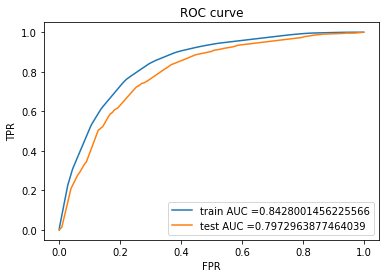

[[2281 1806]
 [1035 7726]]


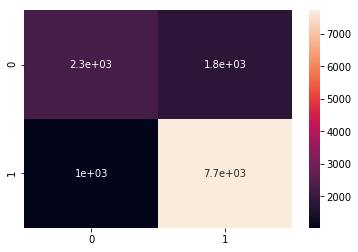

In [51]:
roc_curve(DT)

# 2.Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB
parameter={'alpha': [0.000001,0.00001,0.0001,0.001,0.01,1,10,100,1000,10000,100000]}
NB=MultinomialNB()
gs=GridSearchCV(NB,parameter,cv=5)
gs.fit(X_train_bow,y_train)
gs.best_params_

{'alpha': 1}

In [58]:
NB=MultinomialNB(alpha=1)
accuracy=accuracy_of_model(NB,X_train_bow,y_train,X_test_bow,y_test)

The accuracy  is 0.8669831880448319


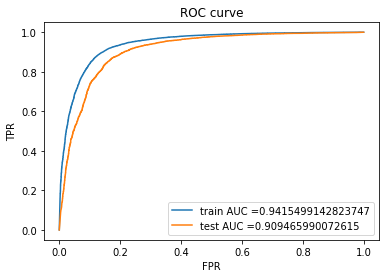

[[3032 1055]
 [ 654 8107]]


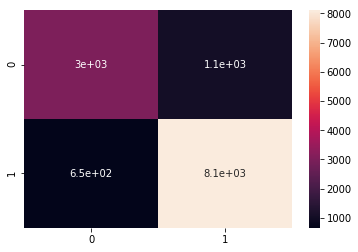

In [59]:
roc_curve(NB)

# 3.Logistic Regression

In [34]:
param={'C':[10**-4, 10**-2, 10**0, 10**2, 10**4],'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,param,cv=5)
gs.fit(X_train_bow,y_train)
gs.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [35]:
log=LogisticRegression(C=0.01,penalty='l2')
accuracy=accuracy_of_model(log,X_train_bow,y_train,X_test_bow,y_test)

The accuracy  is 0.8730541718555417


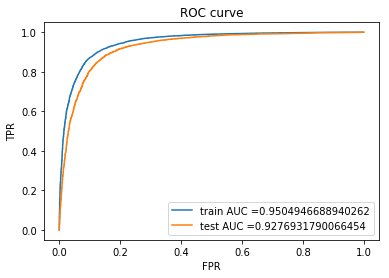

[[2919 1168]
 [ 463 8298]]


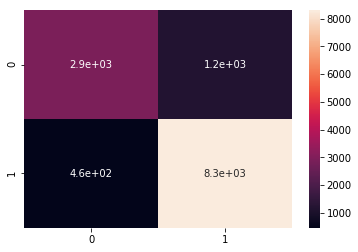

In [36]:
roc_curve(log)

# 4.RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[10,50,100,500,1000],'max_depth':[1, 5, 10, 50, 100, 500, 1000]}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=5)
gs.fit(X_train_bow,y_train)
gs.best_params_ 

{'max_depth': 1000, 'n_estimators': 1000}

In [33]:
RF=RandomForestClassifier(n_estimators=1000,max_depth=1000)
accuracy=accuracy_of_model(RF,X_train_bow,y_train,X_test_bow,y_test)

The accuracy  is 0.8423100871731009


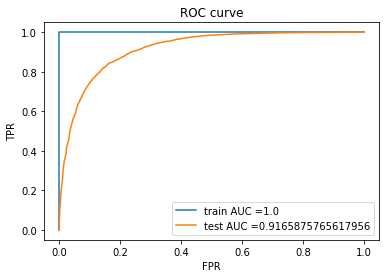

[[2253 1834]
 [ 192 8569]]


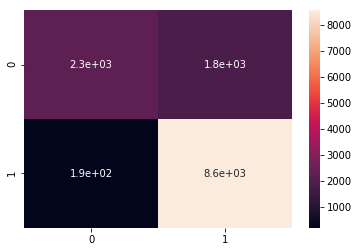

In [34]:
roc_curve(RF)

In [2]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Accuracy", "Train AUC", 'Test AUC']
x.add_row(["BOW","Decision Tree",0.77,0.84,0.79])
x.add_row(["BOW","Naive Bayes",0.86,0.94,0.90])
x.add_row(["BOW","Logistic Regression",0.87,0.95,0.92])
x.add_row(["BOW","RandomForest",0.84,1.0,0.91])

print(x)

+------------+---------------------+----------+-----------+----------+
| Vectorizer |        Model        | Accuracy | Train AUC | Test AUC |
+------------+---------------------+----------+-----------+----------+
|    BOW     |    Decision Tree    |   0.77   |    0.84   |   0.79   |
|    BOW     |     Naive Bayes     |   0.86   |    0.94   |   0.9    |
|    BOW     | Logistic Regression |   0.87   |    0.95   |   0.92   |
|    BOW     |     RandomForest    |   0.84   |    1.0    |   0.91   |
+------------+---------------------+----------+-----------+----------+


After comparing the model performance it has been observed that Logistic Regression is leading the race as it giving the best performance 
with accuracy of 87% , AUC of 92% without overfitting , hence Logistic regression is selected as our final Model.

Now in the next phase of our model , we will be predicting the response (positive/negative) of the customers using Logistic Regression on  the unseen dataset and at last 
we will be printing some words that are contributing to positive response and negative response respectively.

# Importing the test(Unseen) data set 

In [35]:
data_test=pd.read_csv('test.csv')

In [36]:
data_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


# Null/Missing Value Analysis

In [38]:
data_test.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
dtype: int64

# Preprocessing the Test Reviews 

In [39]:
# Combining all 
from tqdm import tqdm
test_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(data_test['Description'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    test_reviews.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29404/29404 [00:20<00:00, 1454.44it/s]


# Featurisation of the test reviews

In [40]:
test_review_bow = vectorizer.transform(test_reviews)

# Applyinng  Logistic Regression on the Test Reviews

In [43]:
log=LogisticRegression(C=0.01,penalty='l2')
accuracy=accuracy_of_model(log,X_train_bow,y_train,X_test_bow,y_test)

The accuracy  is 0.8730541718555417


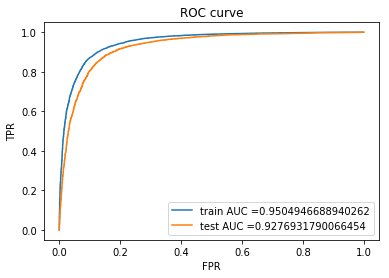

[[2919 1168]
 [ 463 8298]]


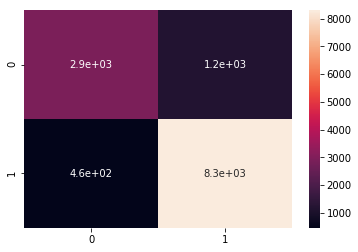

In [44]:
roc_curve(log)

# Predicting the Response of the Test (Unseen) Reviews

In [45]:
pred = log.predict(test_review_bow)

# Saving the review and predicted response on a dictionary

In [49]:
dict={'Reviews':data_test['Description'],'Response':pred}

# Converting the dictionary into Data Frame

In [50]:
predicted_response=pd.DataFrame(dict)

Converting back the reposnse from numerical values to words : 0:'Not Happy',1:'Happy'

In [52]:
predicted_response.replace({0:'Not Happy',1:'Happy'},inplace=True)

# Printing the Final Predicted Response

In [53]:
predicted_response

,Reviews,Response
0,Looking for a motel in close proximity to TV t...,Not Happy
1,Walking distance to Madison Square Garden and ...,Happy
2,Visited Seattle on business. Spent - nights in...,Happy
3,This hotel location is excellent and the rooms...,Not Happy
4,This hotel is awesome I love the service Antho...,Happy
...,...,...
29399,I stayed at the hotel and towers for a confere...,Happy
29400,Trying to stay within the Marriott family and ...,Happy
29401,"We stayed for - nights with our little dog,ver...",Happy
29402,Stayed at the Yotel over the weekend and was v...,Happy


# Top 50 important features of positive class 

In [56]:
#print(top_50_positive)
weight=log.coef_[0, :].argsort()
weight_sorted=weight[ : : -1]
positive_Features=np.take(vectorizer.get_feature_names(), weight_sorted[:50])




In [60]:
positive_Features

array(['perfect', 'excellent', 'wonderful', 'loved', 'great',
       'definitely', 'quiet', 'comfortable', 'amazing', 'spacious',
       'highly', 'enjoyed', 'fantastic', 'modern', 'happy', 'beautiful',
       'everything', 'helpful', 'pleased', 'love', 'recommend', 'always',
       'everyone', 'outstanding', 'lovely', 'comfy', 'complaint',
       'thanks', 'clean', 'thank', 'appointed', 'friendly', 'nicely',
       'large', 'awesome', 'ride', 'home', 'beat', 'nice', 'king',
       'professional', 'plenty', 'best', 'nyc', 'spotless', 'super',
       'negative', 'perfectly', 'cool', 'works'], dtype='<U28')

# Top 50 important features of negative class

In [65]:
#print(top_50_negative)
weight=log.coef_[0, :].argsort()
weight_sorted=weight[ : : 1]
negative_Features=np.take(vectorizer.get_feature_names(), weight_sorted[:50])
negative_Features




array(['dirty', 'worst', 'rude', 'ok', 'old', 'average', 'terrible',
       'poor', 'nothing', 'walls', 'broken', 'horrible', 'smell', 'okay',
       'told', 'dated', 'money', 'uncomfortable', 'carpet', 'however',
       'no', 'stains', 'worn', 'disappointed', 'noisy', 'bad', 'tiny',
       'elsewhere', 'trying', 'not', 'outdated', 'motel', 'pay', 'filthy',
       'disappointing', 'dark', 'basic', 'never', 'sleep', 'furniture',
       'overpriced', 'disgusting', 'awful', 'needs', 'loud', 'somewhere',
       'smelled', 'musty', 'barely', 'better'], dtype='<U28')

# Conclusion 
In this project we have worked on the hotel review dataset and predicted the response(Happy/Not Happy) of the customer.

The project has been divided into several parts as below :-
     
a) Initially after  importing the required dataset , we have worked on EDA and preprocessing of the dataset. In this step the review 
of the customer is preprocessed by cleaning the text and making it suitable for the modelling .

b)In the next part of project , after cleaning we have featurized the description and vectorized the cleaned text to numerical vector for the prediction 

c) In this part of the project we have taken featurized text into several models for the classification and we have selected logistic regression as our final model.

d)In the last part of the project as we have already selected the logistic regression as our final model based on the performance ,
we have input the unseen reviews of the hotel to the model and predicted the response , and at last we have also displayed the top 50 features  for positive and negative response.
